# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import timeit
import pickle 
from os import path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , explained_variance_score
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, roc_curve, classification_report, auc)
import warnings
warnings.filterwarnings("ignore")

## Readind Dataset

In [2]:
binary_data = pd.read_csv('binary_data.csv')
binary_data = binary_data.iloc[:,1:]
binary_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
0,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
1,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
2,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
3,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
4,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
81169,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
81170,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
81171,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


## Splitting of training & testing dataset 

In [3]:
X = binary_data.iloc[:,:-1]
Y = binary_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=10)

### Decision Tree & Random Forest for Level - 1 & Level - 2 classification

In [4]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
rf = RandomForestClassifier(n_estimators=20,criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

### Saving Model formed
- Decision Tree

In [169]:
pkl_filename = "models/dt_binary.pkl"
if (not path.isfile(pkl_filename)): 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(dt, file)
        print("DT model saved to disk")
else:
    print("Model already saved")

DT model saved to disk


- Random Forest

In [170]:
pkl_filename = "models/rf_binary.pkl"
if (not path.isfile(pkl_filename)): 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(dt, file)
        print("RF model saved to disk")
else:
    print("Model already saved")

RF model saved to disk


### Getting the Threshold value

In [7]:
xt = X_train.values
avg = 0.0
save_time = []
for x in xt:
    start = timeit.default_timer()
    y_ = dt.predict([x]) 
    stop = timeit.default_timer()
    avg += (stop - start)
    save_time.append(stop-start)
#     print(stop - start)
theta_ = avg / xt.shape[0]
theta_

8.21095264075307e-05

- Storing the dropped packets & received packets

In [19]:
drop_packets = []
xt = X_test.values
yt = y_test.values

### Level 1 classifier - DT

In [20]:
dataset_collected_for_rf_ind = []
data_dt_ypred_y_true = []
total_rf = 0
for i in range(xt.shape[0]):
    start = timeit.default_timer()
    y_pred = dt.predict([xt[i]])
    if timeit.default_timer() - start > theta_:
        total_rf += 1
        dataset_collected_for_rf_ind.append(i)
        continue
#     if y_pred == 1:
#         drop_packets.append(xt[i])
    data_dt_ypred_y_true.append([y_pred,yt[i]])

### Checking the peformance metrics for Level 1 classifier - DT

In [21]:
ctt = 0
dt_y_pred = []
dt_y_test = []
for y_p , y_t in data_dt_ypred_y_true:
    dt_y_pred.append(y_p)
    dt_y_test.append(y_t)
    if y_p != y_t:
        ctt += 1

In [22]:
print("Mean Squared Error      - " , mean_squared_error(dt_y_test, dt_y_pred))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(dt_y_test, dt_y_pred)))
print("R2 Score                - " , explained_variance_score(dt_y_test, dt_y_pred)*100)
print("Accuracy                - ",accuracy_score(dt_y_test,dt_y_pred)*100)
print(classification_report(y_true=dt_y_test, y_pred=dt_y_pred,target_names=['abnormal', 'normal']))

Mean Squared Error      -  0.01849418406580036
Root Mean Squared Error -  0.13599332360744903
R2 Score                -  89.85495013366729
Accuracy                -  98.15058159341996
              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     15620
      normal       0.96      0.96      0.96      4927

    accuracy                           0.98     20547
   macro avg       0.97      0.98      0.97     20547
weighted avg       0.98      0.98      0.98     20547



### Plot between Real and Predicted Data - L1 Classifier DT

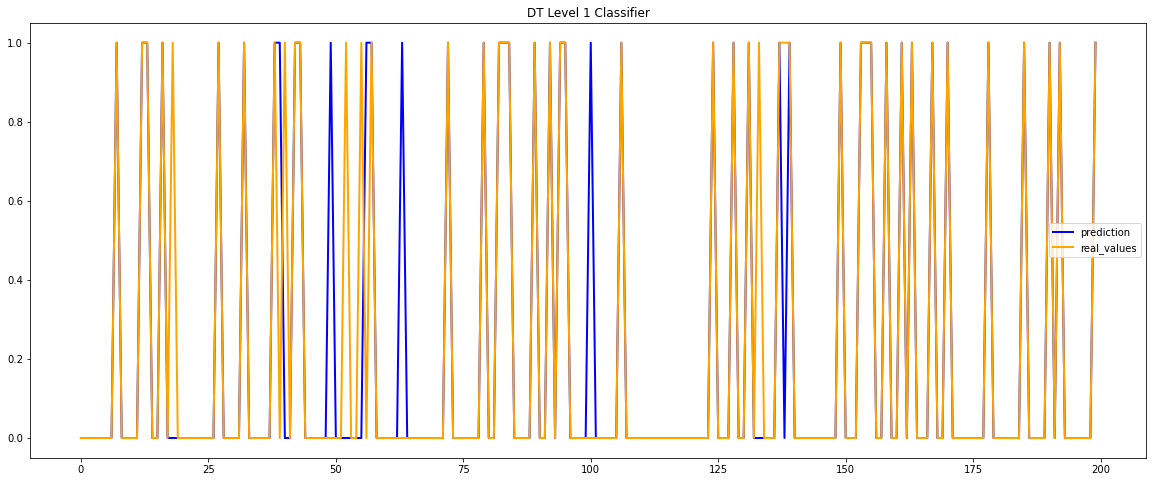

In [12]:
plt.figure(figsize=(20,8))
plt.plot(dt_y_pred[0:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(dt_y_test[0:200], label="real_values", linewidth=2.0,color='orange')
plt.legend(loc="best")
plt.title("DT Level 1 Classifier")
plt.savefig('plots/L1_DT.jpg')
plt.show()

### Level 2 classifier - RF

In [23]:
data_rf_ypred_y_true = []
for ind in dataset_collected_for_rf_ind:
    y_pred = rf.predict([xt[ind]])
#     if y_pred == 1:
#         drop_packets.append(xt[ind])
    data_rf_ypred_y_true.append([y_pred,yt[ind]])

### Checking the peformance metrics for Level 2 classifier - RF

In [24]:
ctt2 = 0
rf_y_pred = []
rf_y_test = []
for y_p , y_t in data_rf_ypred_y_true:
    rf_y_pred.append(y_p)
    rf_y_test.append(y_t)
    if y_p != y_t:
        ctt2 += 1

In [25]:
print("Mean Squared Error      - " , mean_squared_error(rf_y_test, rf_y_pred))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(rf_y_test, rf_y_pred)))
print("R2 Score                - " , explained_variance_score(rf_y_test, rf_y_pred)*100)
print("Accuracy                - ",accuracy_score(rf_y_test,rf_y_pred)*100)
print(classification_report(y_true=rf_y_test, y_pred=rf_y_pred,target_names=['abnormal', 'normal']))

Mean Squared Error      -  0.017082785808147174
Root Mean Squared Error -  0.1307011316253504
R2 Score                -  90.73367357426272
Accuracy                -  98.29172141918528
              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99      2879
      normal       0.97      0.96      0.96       926

    accuracy                           0.98      3805
   macro avg       0.98      0.97      0.98      3805
weighted avg       0.98      0.98      0.98      3805



### Plot between Real and Predicted Data - L2 Classifier RF

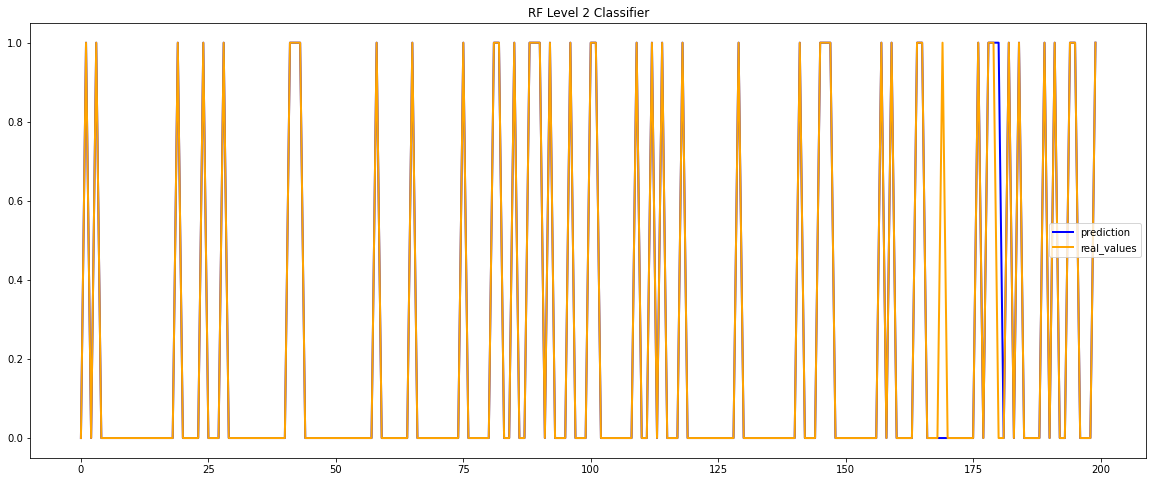

In [18]:
plt.figure(figsize=(20,8))
plt.plot(rf_y_pred[100:300], label="prediction", linewidth=2.0,color='blue')
plt.plot(rf_y_test[100:300], label="real_values", linewidth=2.0,color='orange')
plt.legend(loc="best")
plt.title("RF Level 2 Classifier")
plt.savefig('plots/L2_RF.jpg')
plt.show()

In [28]:
drop_packets

[array([2.74977074e-03, 0.00000000e+00, 2.10051934e-04, 2.68157886e-02,
        3.92156863e-02, 0.00000000e+00, 2.00000000e-02, 2.00000000e-02,
        0.00000000e+00, 0.00000000e+00, 1.01694915e-01, 3.92156863e-02,
        1.00000000e+00, 0.00000000e+00]),
 array([3.02114804e-03, 0.00000000e+00, 2.27285441e-04, 2.91029683e-02,
        3.92156863e-02, 0.00000000e+00, 2.00000000e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.77966102e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]),
 array([0.00272432, 0.        , 0.00374014, 0.03448975, 0.        ,
        0.        , 0.02      , 0.        , 0.        , 0.        ,
        0.01694915, 0.        , 0.        , 0.        ]),
 array([0.00436497, 0.        , 0.00595685, 0.05526033, 0.        ,
        0.        , 0.04      , 0.        , 0.        , 0.01960784,
        0.        , 0.        , 0.        , 0.        ]),
 array([3.87902909e-05, 1.38392857e-01, 6.17982568e-06, 7.75019401e-04,
        1.96078431e-02, 

In [27]:
len(drop_packets)

5852

In [29]:
np.savetxt('Drop_packets/dropped.txt', drop_packets, delimiter=',')